# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
# train & test data are downloaded into the datasets folder
training_file = 'Datasets/train.p'
testing_file = 'Datasets/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

training data: array of images
x_train - training data
y_train - training label

testing data: array of images
x_test - testing data
y_test - testing labels

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
# Import Python dependencieis
import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])


# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline


In [4]:
#Explore the signname table first
sign_table=pd.read_csv("signnames.csv")
print("We have",len(sign_table),"sign labels in this table.","\nHere are some examples:")
sign_table.head()

We have 43 sign labels in this table. 
Here are some examples:


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


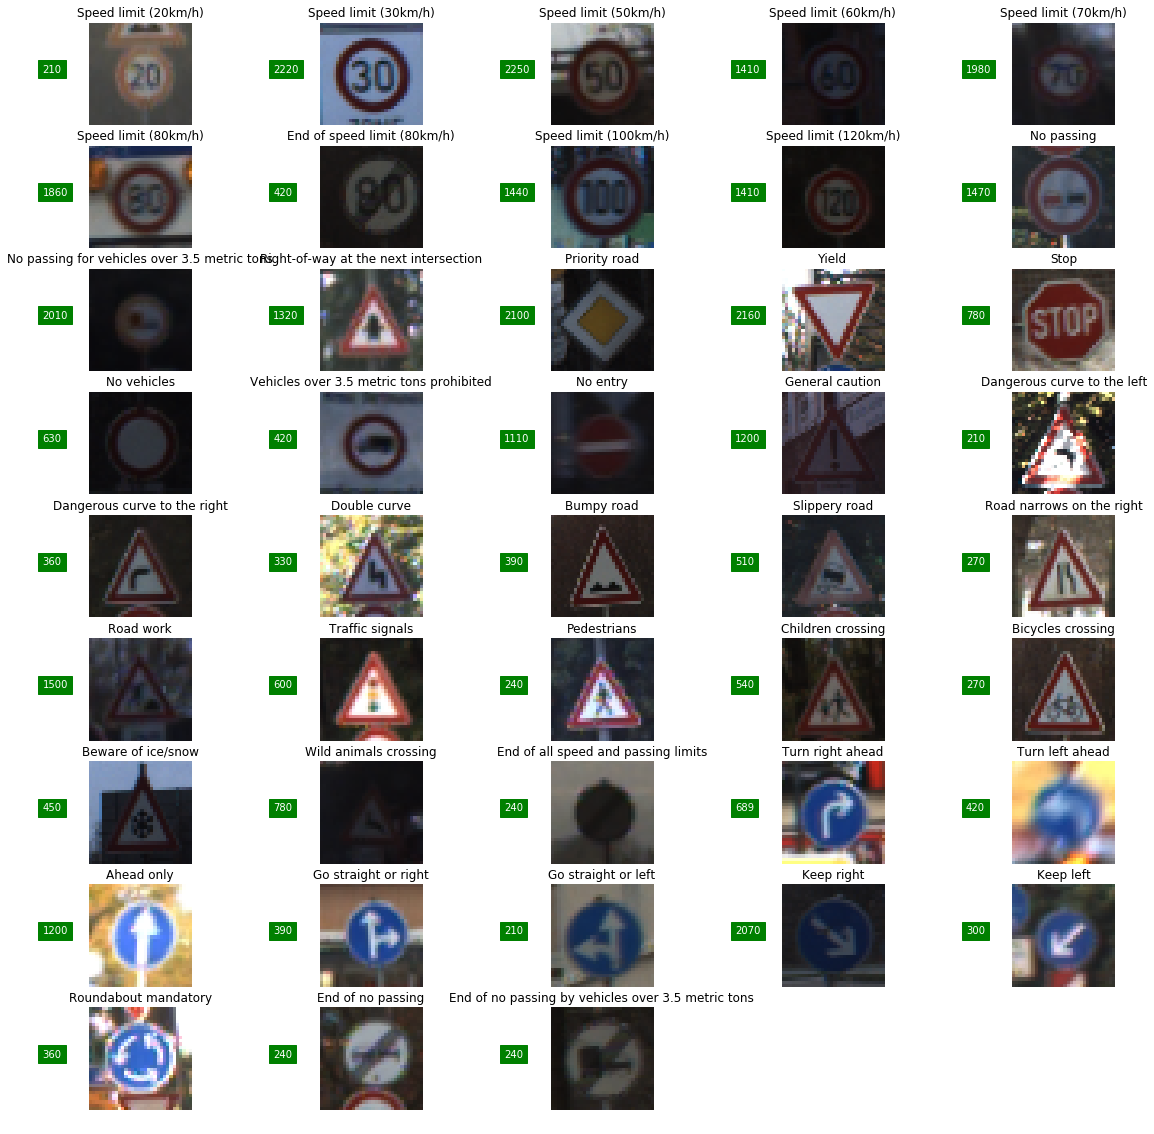

In [5]:
#Investigate a random image of each sign
import random

sign_names=sign_table['SignName'].tolist()
for idex, name in enumerate(sign_names):
    group=np.where(y_train == idex)[0]
    gnum=len(group)
    ind=random.randint(0, gnum-1)
    img = X_train[group[ind]]
    plt.subplot(9, 5, idex + 1)
    plt.imshow(img)
    plt.title(name)
    plt.axis("off")
    plt.text(-15, 15, str(gnum),backgroundcolor='g',color='w')
    
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()

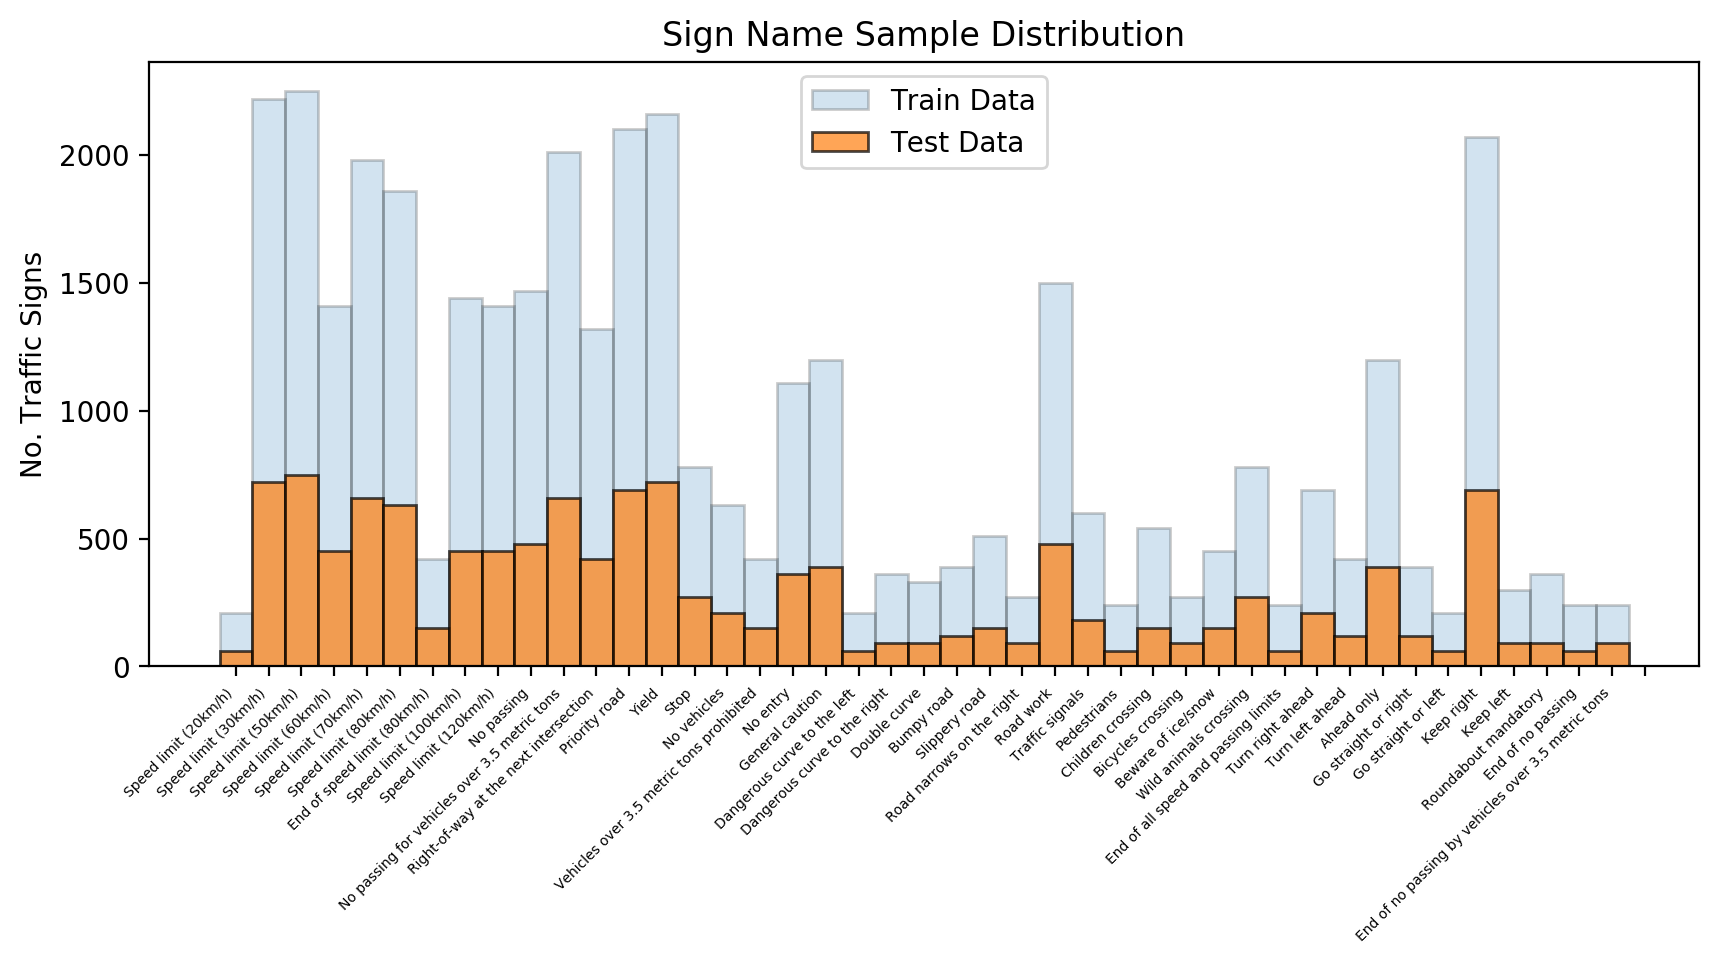

In [6]:
#Investigate the class distribution of sign names 
bins = np.linspace(0,43,44)-0.5
sign_names=sign_table['SignName'].values
fig = plt.figure(figsize=(10,4), dpi=200)
plt.ylabel('No. Traffic Signs')
plt.title("Sign Name Sample Distribution")
plt.hist(y_train,bins,alpha=0.2,label=['Train Data'],edgecolor = "black")
plt.hist(y_test,bins,alpha=0.7,label=['Test Data'],edgecolor = "black")
plt.xticks(bins+0.5,sign_names,rotation=45,fontsize=5,ha='right')

plt.legend()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
import sklearn
print("Scikit-Learn", sklearn.__version__)

Scikit-Learn 0.18.1


In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from tqdm import trange
import cv2

def cal_mean_std(data):
    mean_std=[np.mean(data),np.std(data)] 
    return mean_std

def data_norm(data, mean_std):
    data_norm = data.copy().astype(np.float32)
    data_channel_i=data_norm
    data_norm=(data_channel_i - mean_std[0])/mean_std[1]
        
    return data_norm

def onehot(ylabel,nclass):
    label_onehot = np.zeros((ylabel.shape[0], nclass), dtype=np.float32)
    label_onehot[np.arange(ylabel.shape[0]), ylabel] = 1.0
    return label_onehot

def grey_equ_imageSets(X):
    new_X=np.zeros([X.shape[0],X.shape[1],X.shape[2]],dtype=np.float32)
    for i in trange(X.shape[0]):
        grey = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)
        equ = cv2.equalizeHist(grey)
        new_X[i]=equ
        
    return new_X

def grey_adp_equ_imageSets(X):
    new_X=np.zeros([X.shape[0],X.shape[1],X.shape[2]],dtype=np.float32)
    for i in trange(X.shape[0]):
        grey = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
        equ = clahe.apply(grey)
        new_X[i]=equ
        
    return new_X


X_test, X_eval = train_test_split(X_test, test_size=0.2, random_state=0)

print("X_train")
X_train=grey_adp_equ_imageSets(X_train)
print("X_test")
X_test=grey_adp_equ_imageSets(X_test)
print("X_validation")
X_eval=grey_adp_equ_imageSets(X_eval)

#start converting data into 0 mean & 1 variance
train_mean_std=cal_mean_std(X_train)
X_train_norm = data_norm(X_train, train_mean_std)
X_test_norm = data_norm(X_test, train_mean_std)
X_eval_norm = data_norm(X_eval, train_mean_std)
y_test_1hot = onehot(y_test,43)
y_train_1hot = onehot(y_train,43)

y_test_1hot, y_eval_1hot = train_test_split(y_test_1hot, test_size=0.2, random_state=0)


X_train_norm=X_train_norm.reshape(X_train_norm.shape[0],X_train_norm.shape[1]*X_train_norm.shape[2])
X_eval_norm=X_eval_norm.reshape(X_eval_norm.shape[0],X_eval_norm.shape[1]*X_eval_norm.shape[2])
X_test_norm=X_test_norm.reshape(X_test_norm.shape[0],X_test_norm.shape[1]*X_test.shape[2])

print('Training Shape:', X_train_norm.shape, y_train_1hot.shape)
print('Validation Shape:', X_eval_norm.shape, y_eval_1hot.shape)
print('Testing Shape:', X_test_norm.shape, y_test_1hot.shape)
print('Data is ready!')

X_train


100%|█████████████████████████████████████████████████████████████████████████| 39209/39209 [00:00<00:00, 46985.08it/s]


X_test


100%|█████████████████████████████████████████████████████████████████████████| 10104/10104 [00:00<00:00, 45309.99it/s]


X_validation


100%|███████████████████████████████████████████████████████████████████████████| 2526/2526 [00:00<00:00, 45929.41it/s]


Training Shape: (39209, 1024) (39209, 43)
Validation Shape: (2526, 1024) (2526, 43)
Testing Shape: (10104, 1024) (10104, 43)
Data is ready!


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Before data standardization, I applied Adaptive Histogram Equalization(AHE) to improve contrast in input images. This approach computes several histograms, each corresponding to a distinct section of the image and uses them to redistribute the lightness values of the image. After several tests on different sets of tile Grid Size(by default 8X8), I found AHE with 4X4 tileGridSize improves test accuracy from 95% (with Histogram Equalization) to 97%.

After AHE transformation, I was following a very typical(I mean, conventional) data pre-processing standardization: 
1. Normalize data into zero-mean & unit-variance
2. Split the whole dataset into training dataset, validation dataset and testing dataset.

The standardization of zero-mean & unit-variance is used largely because many elements in the objective function 
of a learning algorithm pre-assume that all features are zero-centered and have variance in the same order. But this
is not the case for all scenarios.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Based on the class distribution analysis of sign names earlier in this notebook, I found the the original training dataset is around 3.5 times of the testing data(almost an 80/20 split). Since my parameter estimates might have greater variances with less training data, I also choose an 80/20 rule to split the training dataset into training dataset & validation set.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 reshaped image   				        | 
| Convolution Layer    	| 1x1 stride, same padding, outputs 32x32x32	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 16x16x32 				|
| Dropout	            | with prob 0.5     							|
| Convolution Layer   	| 1x1 stride, same padding, outputs 16x16x64 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 8x8x64 				    |
| Dropout	            | with prob 0.5      							|
| Convolution Layer   	| 1x1 stride, same padding, outputs 8x8x128 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 4x4x128 				    |
| Dropout	            | with prob 0.5    	                            |
| Flatten	            | output size 2048    	                        |
| Fully Connected 1    	| output size 1024                           	|
| Dropout				| with prob 0.5									|
| Fully Connected 2	    | output size 1024 				                |
| Dropout	            | with prob 0.5    	                            |
| Output Layer  	    | output size 43   	                            |

In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.

#Initialization & all self-defined functions
import tensorflow as tf
from tqdm import trange
from time import sleep
from random import random, randint

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.01,shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

def cnn_logits(x):
    x_image = tf.reshape(x, [-1,32,32,1])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    h_pool1_drop = tf.nn.dropout(h_pool1, keep_prob)
    h_conv2 = tf.nn.relu(conv2d(h_pool1_drop, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    h_pool2_drop = tf.nn.dropout(h_pool2, keep_prob)
    h_conv3 = tf.nn.relu(conv2d(h_pool2_drop, W_conv3) + b_conv3)
    h_pool3 = max_pool_2x2(h_conv3)
    h_pool3_drop = tf.nn.dropout(h_pool3, keep_prob)
    h_pool3_flat = tf.reshape(h_pool3, [-1, 4*4*128])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat, W_fc1) + b_fc1)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
    h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)
    y_conv = tf.matmul(h_fc2_drop, W_fc3) + b_fc3
    return y_conv


In [10]:
#All definations of placeholders & variables
from sklearn.utils import shuffle
batch_size = 120
EPOCHS = 500
learning_rate=0.001
save_file = './train_tf_model.ckpt'

x = tf.placeholder(tf.float32, shape=[None, 1024])
y = tf.placeholder(tf.float32, shape=[None, 43])
keep_prob = tf.placeholder(tf.float32)


W_conv1 = weight_variable([3, 3, 1, 32])
b_conv1 = bias_variable([32])
W_conv2 = weight_variable([3, 3, 32, 64])
b_conv2 = bias_variable([64])
W_conv3 = weight_variable([3, 3, 64, 128])
b_conv3 = bias_variable([128])
W_fc1 = weight_variable([32 * 64, 1024])
b_fc1 = bias_variable([1024])
W_fc2 = weight_variable([1024, 1024])
b_fc2 = bias_variable([1024])
W_fc3 = weight_variable([1024, 43])
b_fc3 = bias_variable([43])
regularization = tf.nn.l2_loss(W_conv1) + tf.nn.l2_loss(W_conv2) + tf.nn.l2_loss(W_conv3) + tf.nn.l2_loss(W_fc1) + tf.nn.l2_loss(W_fc2) + tf.nn.l2_loss(W_fc3)
y_conv = cnn_logits(x)


In [11]:
#Define cost functions & optimzers
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y))+ 0.00001*regularization
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
optimizer2 = tf.train.MomentumOptimizer(learning_rate,0.9).minimize(cross_entropy)
optimizer3 = tf.train.AdagradOptimizer(learning_rate).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
train_num=len(X_train_norm)


In [12]:
#Running Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(EPOCHS):
        X_train_norm, y_train_1hot = shuffle(X_train_norm, y_train_1hot)
        batch_iter=train_num//batch_size
        bis=trange(batch_iter)
        for iteration in bis:
            batch_begin= iteration * batch_size
            batch_end=batch_begin+batch_size
            X_batch, y_batch = X_train_norm[batch_begin:batch_end], y_train_1hot[batch_begin:batch_end]
            train_accuracy=accuracy.eval(feed_dict = {x: X_batch, y: y_batch, keep_prob: 0.5})
            if iteration%5 == 0:
                optimizer2.run(feed_dict = {x: X_batch,y: y_batch, keep_prob: 0.5})
            else:
                optimizer.run(feed_dict = {x: X_batch,y: y_batch, keep_prob: 0.5})
            bis.set_description('Epoch %i' % epoch)
            bis.set_postfix(T_Accuracy="{:.1%}".format(train_accuracy))
        
        print("Validation accuracy: %g"%accuracy.eval(feed_dict={x: X_eval_norm, y: y_eval_1hot, keep_prob: 1.0}))
    
    saver.save(sess, save_file)
    print("test accuracy: %g"%accuracy.eval(feed_dict={x: X_test_norm, y: y_test_1hot, keep_prob: 1.0}))


Epoch 0: 100%|█████████████████████████████████████████████████████| 326/326 [00:05<00:00, 55.90it/s, T_Accuracy=40.0%]


Validation accuracy: 0.52692


Epoch 1: 100%|█████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.09it/s, T_Accuracy=78.3%]


Validation accuracy: 0.836896


Epoch 2: 100%|█████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.28it/s, T_Accuracy=84.2%]


Validation accuracy: 0.915677


Epoch 3: 100%|█████████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.24it/s, T_Accuracy=85.8%]


Validation accuracy: 0.933888


Epoch 4: 100%|█████████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.36it/s, T_Accuracy=91.7%]


Validation accuracy: 0.94616


Epoch 5: 100%|█████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.62it/s, T_Accuracy=95.8%]


Validation accuracy: 0.956849


Epoch 6: 100%|█████████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.02it/s, T_Accuracy=94.2%]


Validation accuracy: 0.952098


Epoch 7: 100%|█████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.42it/s, T_Accuracy=97.5%]


Validation accuracy: 0.960412


Epoch 8: 100%|█████████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.57it/s, T_Accuracy=94.2%]


Validation accuracy: 0.966746


Epoch 9: 100%|█████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.73it/s, T_Accuracy=95.8%]


Validation accuracy: 0.967538


Epoch 10: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.86it/s, T_Accuracy=96.7%]


Validation accuracy: 0.963183


Epoch 11: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.84it/s, T_Accuracy=99.2%]


Validation accuracy: 0.962391


Epoch 12: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.83it/s, T_Accuracy=94.2%]


Validation accuracy: 0.967538


Epoch 13: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.01it/s, T_Accuracy=97.5%]


Validation accuracy: 0.965954


Epoch 14: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.95it/s, T_Accuracy=94.2%]


Validation accuracy: 0.96635


Epoch 15: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.82it/s, T_Accuracy=95.0%]


Validation accuracy: 0.96635


Epoch 16: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.72it/s, T_Accuracy=94.2%]


Validation accuracy: 0.963183


Epoch 17: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.32it/s, T_Accuracy=98.3%]


Validation accuracy: 0.96437


Epoch 18: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.66it/s, T_Accuracy=95.0%]


Validation accuracy: 0.967142


Epoch 19: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=97.5%]


Validation accuracy: 0.965162


Epoch 20: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.69it/s, T_Accuracy=95.0%]


Validation accuracy: 0.965954


Epoch 21: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.73it/s, T_Accuracy=100.0%]


Validation accuracy: 0.966746


Epoch 22: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.94it/s, T_Accuracy=99.2%]


Validation accuracy: 0.96437


Epoch 23: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.98it/s, T_Accuracy=98.3%]


Validation accuracy: 0.968329


Epoch 24: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.05it/s, T_Accuracy=97.5%]


Validation accuracy: 0.967142


Epoch 25: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.90it/s, T_Accuracy=95.0%]


Validation accuracy: 0.972684


Epoch 26: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.83it/s, T_Accuracy=96.7%]


Validation accuracy: 0.967142


Epoch 27: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.75it/s, T_Accuracy=97.5%]


Validation accuracy: 0.969517


Epoch 28: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.93it/s, T_Accuracy=97.5%]


Validation accuracy: 0.970309


Epoch 29: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.91it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971101


Epoch 30: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.09it/s, T_Accuracy=97.5%]


Validation accuracy: 0.96635


Epoch 31: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.94it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969913


Epoch 32: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.99it/s, T_Accuracy=98.3%]


Validation accuracy: 0.96437


Epoch 33: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.91it/s, T_Accuracy=95.8%]


Validation accuracy: 0.970705


Epoch 34: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.87it/s, T_Accuracy=95.0%]


Validation accuracy: 0.963579


Epoch 35: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.78it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972684


Epoch 36: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.92it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973476


Epoch 37: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.90it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969121


Epoch 38: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.83it/s, T_Accuracy=99.2%]


Validation accuracy: 0.974663


Epoch 39: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.63it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974664


Epoch 40: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.70it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972684


Epoch 41: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.77it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969121


Epoch 42: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.63it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971892


Epoch 43: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.27it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969517


Epoch 44: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.81it/s, T_Accuracy=99.2%]


Validation accuracy: 0.965162


Epoch 45: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.53it/s, T_Accuracy=97.5%]


Validation accuracy: 0.969517


Epoch 46: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.78it/s, T_Accuracy=97.5%]


Validation accuracy: 0.970309


Epoch 47: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.66it/s, T_Accuracy=96.7%]


Validation accuracy: 0.968725


Epoch 48: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.76it/s, T_Accuracy=98.3%]


Validation accuracy: 0.963579


Epoch 49: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.45it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971496


Epoch 50: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.61it/s, T_Accuracy=96.7%]


Validation accuracy: 0.971496


Epoch 51: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.45it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973476


Epoch 52: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.05it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974664


Epoch 53: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.53it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970705


Epoch 54: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.74it/s, T_Accuracy=98.3%]


Validation accuracy: 0.975455


Epoch 55: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.77it/s, T_Accuracy=99.2%]


Validation accuracy: 0.974663


Epoch 56: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.66it/s, T_Accuracy=97.5%]


Validation accuracy: 0.97308


Epoch 57: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.03it/s, T_Accuracy=99.2%]


Validation accuracy: 0.967538


Epoch 58: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.28it/s, T_Accuracy=96.7%]


Validation accuracy: 0.970705


Epoch 59: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.10it/s, T_Accuracy=100.0%]


Validation accuracy: 0.968725


Epoch 60: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.47it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969913


Epoch 61: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.82it/s, T_Accuracy=97.5%]


Validation accuracy: 0.972288


Epoch 62: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.61it/s, T_Accuracy=97.5%]


Validation accuracy: 0.96635


Epoch 63: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.70it/s, T_Accuracy=98.3%]


Validation accuracy: 0.965954


Epoch 64: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.80it/s, T_Accuracy=95.8%]


Validation accuracy: 0.970705


Epoch 65: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.78it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 66: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.72it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969517


Epoch 67: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.71it/s, T_Accuracy=99.2%]


Validation accuracy: 0.967142


Epoch 68: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.23it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969517


Epoch 69: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.08it/s, T_Accuracy=100.0%]


Validation accuracy: 0.968725


Epoch 70: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.10it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970309


Epoch 71: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.19it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972684


Epoch 72: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.60it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969517


Epoch 73: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.88it/s, T_Accuracy=100.0%]


Validation accuracy: 0.968329


Epoch 74: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.08it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968725


Epoch 75: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.74it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971101


Epoch 76: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.77it/s, T_Accuracy=98.3%]


Validation accuracy: 0.97308


Epoch 77: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.72it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973872


Epoch 78: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971496


Epoch 79: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.26it/s, T_Accuracy=100.0%]


Validation accuracy: 0.972684


Epoch 80: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.74it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971101


Epoch 81: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.72it/s, T_Accuracy=99.2%]


Validation accuracy: 0.97506


Epoch 82: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.20it/s, T_Accuracy=100.0%]


Validation accuracy: 0.97308


Epoch 83: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.92it/s, T_Accuracy=98.3%]


Validation accuracy: 0.97308


Epoch 84: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.31it/s, T_Accuracy=100.0%]


Validation accuracy: 0.975455


Epoch 85: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.36it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973872


Epoch 86: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 59.85it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968329


Epoch 87: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.79it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 88: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.28it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970705


Epoch 89: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.10it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971892


Epoch 90: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.63it/s, T_Accuracy=98.3%]


Validation accuracy: 0.965954


Epoch 91: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.77it/s, T_Accuracy=95.0%]


Validation accuracy: 0.972288


Epoch 92: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.57it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973872


Epoch 93: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.48it/s, T_Accuracy=97.5%]


Validation accuracy: 0.969517


Epoch 94: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.51it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970705


Epoch 95: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 59.78it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968725


Epoch 96: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.53it/s, T_Accuracy=95.8%]


Validation accuracy: 0.971892


Epoch 97: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.68it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972288


Epoch 98: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.44it/s, T_Accuracy=99.2%]


Validation accuracy: 0.975059


Epoch 99: 100%|████████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.61it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971101


Epoch 100: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.76it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971101


Epoch 101: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.51it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 102: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.63it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969121


Epoch 103: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.61it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972684


Epoch 104: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.94it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973872


Epoch 105: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.37it/s, T_Accuracy=97.5%]


Validation accuracy: 0.965954


Epoch 106: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.41it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 107: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.82it/s, T_Accuracy=97.5%]


Validation accuracy: 0.972684


Epoch 108: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.06it/s, T_Accuracy=99.2%]


Validation accuracy: 0.974268


Epoch 109: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.36it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972288


Epoch 110: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.03it/s, T_Accuracy=97.5%]


Validation accuracy: 0.968329


Epoch 111: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.47it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969121


Epoch 112: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.95it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971892


Epoch 113: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.10it/s, T_Accuracy=97.5%]


Validation accuracy: 0.969517


Epoch 114: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.12it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971101


Epoch 115: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.30it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972288


Epoch 116: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.38it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971101


Epoch 117: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.39it/s, T_Accuracy=98.3%]


Validation accuracy: 0.967933


Epoch 118: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.24it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969121


Epoch 119: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.14it/s, T_Accuracy=96.7%]


Validation accuracy: 0.973476


Epoch 120: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.26it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972684


Epoch 121: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.01it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973872


Epoch 122: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.73it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973872


Epoch 123: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.67it/s, T_Accuracy=96.7%]


Validation accuracy: 0.971892


Epoch 124: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.34it/s, T_Accuracy=97.5%]


Validation accuracy: 0.972684


Epoch 125: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.28it/s, T_Accuracy=97.5%]


Validation accuracy: 0.972288


Epoch 126: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.19it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 127: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.25it/s, T_Accuracy=97.5%]


Validation accuracy: 0.973476


Epoch 128: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.02it/s, T_Accuracy=98.3%]


Validation accuracy: 0.968725


Epoch 129: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.31it/s, T_Accuracy=97.5%]


Validation accuracy: 0.967142


Epoch 130: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.89it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969913


Epoch 131: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.37it/s, T_Accuracy=96.7%]


Validation accuracy: 0.971101


Epoch 132: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.92it/s, T_Accuracy=96.7%]


Validation accuracy: 0.969913


Epoch 133: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.66it/s, T_Accuracy=97.5%]


Validation accuracy: 0.970705


Epoch 134: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.07it/s, T_Accuracy=97.5%]


Validation accuracy: 0.97308


Epoch 135: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.33it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 136: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.21it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969913


Epoch 137: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.63it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970309


Epoch 138: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.72it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971496


Epoch 139: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.90it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969121


Epoch 140: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.57it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969913


Epoch 141: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.27it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968725


Epoch 142: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971892


Epoch 143: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.80it/s, T_Accuracy=100.0%]


Validation accuracy: 0.972684


Epoch 144: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971892


Epoch 145: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.69it/s, T_Accuracy=96.7%]


Validation accuracy: 0.972288


Epoch 146: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.23it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 147: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.06it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971496


Epoch 148: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.93it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969121


Epoch 149: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.75it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973476


Epoch 150: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.90it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973476


Epoch 151: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.59it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 152: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.73it/s, T_Accuracy=96.7%]


Validation accuracy: 0.974664


Epoch 153: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.71it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971496


Epoch 154: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.94it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973872


Epoch 155: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.82it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971101


Epoch 156: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.99it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971892


Epoch 157: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.73it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 158: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.39it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971101


Epoch 159: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.89it/s, T_Accuracy=97.5%]


Validation accuracy: 0.972684


Epoch 160: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.79it/s, T_Accuracy=100.0%]


Validation accuracy: 0.972684


Epoch 161: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.87it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969517


Epoch 162: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.81it/s, T_Accuracy=97.5%]


Validation accuracy: 0.969517


Epoch 163: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.06it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 164: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.86it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971892


Epoch 165: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972684


Epoch 166: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.89it/s, T_Accuracy=100.0%]


Validation accuracy: 0.970309


Epoch 167: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.75it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971496


Epoch 168: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.19it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969517


Epoch 169: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.59it/s, T_Accuracy=97.5%]


Validation accuracy: 0.967142


Epoch 170: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.70it/s, T_Accuracy=97.5%]


Validation accuracy: 0.969517


Epoch 171: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.73it/s, T_Accuracy=97.5%]


Validation accuracy: 0.969913


Epoch 172: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.57it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973872


Epoch 173: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.51it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972288


Epoch 174: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.56it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972684


Epoch 175: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.69it/s, T_Accuracy=97.5%]


Validation accuracy: 0.970705


Epoch 176: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.70it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971892


Epoch 177: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.58it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973872


Epoch 178: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.30it/s, T_Accuracy=97.5%]


Validation accuracy: 0.975059


Epoch 179: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.38it/s, T_Accuracy=99.2%]


Validation accuracy: 0.975455


Epoch 180: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.00it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974268


Epoch 181: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.69it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971497


Epoch 182: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.74it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972684


Epoch 183: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.93it/s, T_Accuracy=100.0%]


Validation accuracy: 0.976247


Epoch 184: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.12it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973476


Epoch 185: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.24it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969121


Epoch 186: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.41it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969517


Epoch 187: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.39it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970309


Epoch 188: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.33it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973872


Epoch 189: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.25it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968329


Epoch 190: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.17it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 191: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.10it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969517


Epoch 192: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.87it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969913


Epoch 193: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.96it/s, T_Accuracy=96.7%]


Validation accuracy: 0.969913


Epoch 194: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.95it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971101


Epoch 195: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.76it/s, T_Accuracy=96.7%]


Validation accuracy: 0.971496


Epoch 196: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.09it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972288


Epoch 197: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 59.46it/s, T_Accuracy=100.0%]


Validation accuracy: 0.968329


Epoch 198: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.89it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974664


Epoch 199: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.44it/s, T_Accuracy=96.7%]


Validation accuracy: 0.970309


Epoch 200: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.10it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971496


Epoch 201: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.13it/s, T_Accuracy=97.5%]


Validation accuracy: 0.968725


Epoch 202: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.78it/s, T_Accuracy=96.7%]


Validation accuracy: 0.971496


Epoch 203: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.80it/s, T_Accuracy=97.5%]


Validation accuracy: 0.966746


Epoch 204: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.08it/s, T_Accuracy=97.5%]


Validation accuracy: 0.970705


Epoch 205: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.64it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969913


Epoch 206: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.02it/s, T_Accuracy=97.5%]


Validation accuracy: 0.97308


Epoch 207: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.08it/s, T_Accuracy=100.0%]


Validation accuracy: 0.972288


Epoch 208: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.29it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971892


Epoch 209: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.92it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969517


Epoch 210: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.67it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969517


Epoch 211: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.19it/s, T_Accuracy=98.3%]


Validation accuracy: 0.96635


Epoch 212: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.58it/s, T_Accuracy=100.0%]


Validation accuracy: 0.970705


Epoch 213: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.67it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968725


Epoch 214: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.74it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969517


Epoch 215: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.57it/s, T_Accuracy=99.2%]


Validation accuracy: 0.967934


Epoch 216: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.46it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972288


Epoch 217: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.66it/s, T_Accuracy=97.5%]


Validation accuracy: 0.975059


Epoch 218: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.64it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973872


Epoch 219: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.25it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 220: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.51it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969121


Epoch 221: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.43it/s, T_Accuracy=98.3%]


Validation accuracy: 0.967538


Epoch 222: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.54it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971101


Epoch 223: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.51it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969913


Epoch 224: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.58it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971496


Epoch 225: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.54it/s, T_Accuracy=99.2%]


Validation accuracy: 0.97308


Epoch 226: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.71it/s, T_Accuracy=98.3%]


Validation accuracy: 0.968725


Epoch 227: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.74it/s, T_Accuracy=100.0%]


Validation accuracy: 0.970309


Epoch 228: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.49it/s, T_Accuracy=100.0%]


Validation accuracy: 0.970705


Epoch 229: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=96.7%]


Validation accuracy: 0.969517


Epoch 230: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.14it/s, T_Accuracy=100.0%]


Validation accuracy: 0.967934


Epoch 231: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 59.96it/s, T_Accuracy=97.5%]


Validation accuracy: 0.969913


Epoch 232: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.11it/s, T_Accuracy=97.5%]


Validation accuracy: 0.965558


Epoch 233: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.71it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971497


Epoch 234: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.61it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969517


Epoch 235: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.71it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972684


Epoch 236: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.77it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974663


Epoch 237: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.72it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969517


Epoch 238: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.59it/s, T_Accuracy=97.5%]


Validation accuracy: 0.967934


Epoch 239: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.40it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971496


Epoch 240: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.77it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 241: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=100.0%]


Validation accuracy: 0.968329


Epoch 242: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973872


Epoch 243: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.62it/s, T_Accuracy=99.2%]


Validation accuracy: 0.963579


Epoch 244: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.49it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971892


Epoch 245: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.49it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972684


Epoch 246: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.68it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974664


Epoch 247: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.66it/s, T_Accuracy=98.3%]


Validation accuracy: 0.96635


Epoch 248: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.66it/s, T_Accuracy=100.0%]


Validation accuracy: 0.967538


Epoch 249: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.96it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970309


Epoch 250: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.82it/s, T_Accuracy=96.7%]


Validation accuracy: 0.965162


Epoch 251: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=95.8%]


Validation accuracy: 0.969517


Epoch 252: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.71it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973476


Epoch 253: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.67it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971496


Epoch 254: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.69it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970705


Epoch 255: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.52it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 256: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.18it/s, T_Accuracy=97.5%]


Validation accuracy: 0.973872


Epoch 257: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.42it/s, T_Accuracy=99.2%]


Validation accuracy: 0.974663


Epoch 258: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.59it/s, T_Accuracy=100.0%]


Validation accuracy: 0.970705


Epoch 259: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.63it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 260: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973872


Epoch 261: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.72it/s, T_Accuracy=100.0%]


Validation accuracy: 0.974663


Epoch 262: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.55it/s, T_Accuracy=100.0%]


Validation accuracy: 0.970309


Epoch 263: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=98.3%]


Validation accuracy: 0.967933


Epoch 264: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.50it/s, T_Accuracy=97.5%]


Validation accuracy: 0.972684


Epoch 265: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.05it/s, T_Accuracy=95.8%]


Validation accuracy: 0.972288


Epoch 266: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.17it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972684


Epoch 267: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.11it/s, T_Accuracy=98.3%]


Validation accuracy: 0.97308


Epoch 268: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.44it/s, T_Accuracy=98.3%]


Validation accuracy: 0.977831


Epoch 269: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.28it/s, T_Accuracy=95.8%]


Validation accuracy: 0.97308


Epoch 270: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.14it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972288


Epoch 271: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.52it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969517


Epoch 272: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.31it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969913


Epoch 273: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.25it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972684


Epoch 274: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.95it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971101


Epoch 275: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.18it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974268


Epoch 276: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.31it/s, T_Accuracy=95.8%]


Validation accuracy: 0.969517


Epoch 277: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.56it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972684


Epoch 278: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.22it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973476


Epoch 279: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.06it/s, T_Accuracy=96.7%]


Validation accuracy: 0.97308


Epoch 280: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.95it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972684


Epoch 281: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.44it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969121


Epoch 282: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.62it/s, T_Accuracy=96.7%]


Validation accuracy: 0.971496


Epoch 283: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.34it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969517


Epoch 284: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.21it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969121


Epoch 285: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.05it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971496


Epoch 286: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.96it/s, T_Accuracy=96.7%]


Validation accuracy: 0.965558


Epoch 287: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.14it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972684


Epoch 288: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.92it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971101


Epoch 289: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.75it/s, T_Accuracy=97.5%]


Validation accuracy: 0.97308


Epoch 290: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.91it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969517


Epoch 291: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.87it/s, T_Accuracy=97.5%]


Validation accuracy: 0.968725


Epoch 292: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.60it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969121


Epoch 293: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.69it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973872


Epoch 294: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.11it/s, T_Accuracy=97.5%]


Validation accuracy: 0.974268


Epoch 295: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.08it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971496


Epoch 296: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.99it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969121


Epoch 297: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.08it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969913


Epoch 298: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.06it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971496


Epoch 299: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.30it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971496


Epoch 300: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.26it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971496


Epoch 301: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.85it/s, T_Accuracy=100.0%]


Validation accuracy: 0.974268


Epoch 302: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.99it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970705


Epoch 303: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.15it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969913


Epoch 304: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.89it/s, T_Accuracy=97.5%]


Validation accuracy: 0.972288


Epoch 305: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.85it/s, T_Accuracy=97.5%]


Validation accuracy: 0.970309


Epoch 306: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.02it/s, T_Accuracy=99.2%]


Validation accuracy: 0.975455


Epoch 307: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.88it/s, T_Accuracy=97.5%]


Validation accuracy: 0.973872


Epoch 308: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.05it/s, T_Accuracy=100.0%]


Validation accuracy: 0.972684


Epoch 309: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.88it/s, T_Accuracy=98.3%]


Validation accuracy: 0.963183


Epoch 310: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.81it/s, T_Accuracy=97.5%]


Validation accuracy: 0.97308


Epoch 311: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.89it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971101


Epoch 312: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.56it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973476


Epoch 313: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.99it/s, T_Accuracy=100.0%]


Validation accuracy: 0.974268


Epoch 314: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.91it/s, T_Accuracy=99.2%]


Validation accuracy: 0.974663


Epoch 315: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.92it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973872


Epoch 316: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.56it/s, T_Accuracy=100.0%]


Validation accuracy: 0.979018


Epoch 317: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.81it/s, T_Accuracy=99.2%]


Validation accuracy: 0.974664


Epoch 318: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.82it/s, T_Accuracy=99.2%]


Validation accuracy: 0.967538


Epoch 319: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.54it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970705


Epoch 320: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.97it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 321: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.94it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972684


Epoch 322: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.57it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971101


Epoch 323: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.81it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971892


Epoch 324: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.21it/s, T_Accuracy=99.2%]


Validation accuracy: 0.97308


Epoch 325: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.75it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969517


Epoch 326: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.98it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968725


Epoch 327: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.20it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971892


Epoch 328: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.08it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973476


Epoch 329: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.01it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970705


Epoch 330: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.99it/s, T_Accuracy=96.7%]


Validation accuracy: 0.969517


Epoch 331: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.28it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969121


Epoch 332: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.09it/s, T_Accuracy=100.0%]


Validation accuracy: 0.965954


Epoch 333: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.02it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969517


Epoch 334: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.26it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971101


Epoch 335: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.11it/s, T_Accuracy=97.5%]


Validation accuracy: 0.967142


Epoch 336: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.20it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968725


Epoch 337: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.73it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969517


Epoch 338: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.91it/s, T_Accuracy=100.0%]


Validation accuracy: 0.97308


Epoch 339: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.95it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973872


Epoch 340: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.07it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968725


Epoch 341: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.20it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969517


Epoch 342: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.72it/s, T_Accuracy=96.7%]


Validation accuracy: 0.971496


Epoch 343: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.03it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969517


Epoch 344: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.08it/s, T_Accuracy=99.2%]


Validation accuracy: 0.974268


Epoch 345: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.12it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974663


Epoch 346: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.03it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972288


Epoch 347: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.27it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971892


Epoch 348: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.10it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971101


Epoch 349: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.14it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973872


Epoch 350: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.28it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973872


Epoch 351: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.55it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974268


Epoch 352: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.87it/s, T_Accuracy=100.0%]


Validation accuracy: 0.968329


Epoch 353: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.25it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969517


Epoch 354: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.98it/s, T_Accuracy=95.8%]


Validation accuracy: 0.972288


Epoch 355: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.28it/s, T_Accuracy=98.3%]


Validation accuracy: 0.975851


Epoch 356: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.92it/s, T_Accuracy=100.0%]


Validation accuracy: 0.975455


Epoch 357: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.57it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973476


Epoch 358: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.68it/s, T_Accuracy=99.2%]


Validation accuracy: 0.975851


Epoch 359: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.92it/s, T_Accuracy=97.5%]


Validation accuracy: 0.976247


Epoch 360: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.68it/s, T_Accuracy=99.2%]


Validation accuracy: 0.974268


Epoch 361: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.56it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971101


Epoch 362: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.77it/s, T_Accuracy=100.0%]


Validation accuracy: 0.970705


Epoch 363: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.62it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972684


Epoch 364: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.96it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972684


Epoch 365: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.53it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973872


Epoch 366: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.64it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974663


Epoch 367: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.74it/s, T_Accuracy=97.5%]


Validation accuracy: 0.976247


Epoch 368: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.69it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973872


Epoch 369: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.72it/s, T_Accuracy=97.5%]


Validation accuracy: 0.979414


Epoch 370: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.72it/s, T_Accuracy=99.2%]


Validation accuracy: 0.976643


Epoch 371: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.62it/s, T_Accuracy=96.7%]


Validation accuracy: 0.971101


Epoch 372: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 58.80it/s, T_Accuracy=97.5%]


Validation accuracy: 0.97308


Epoch 373: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.98it/s, T_Accuracy=100.0%]


Validation accuracy: 0.97308


Epoch 374: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.68it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971497


Epoch 375: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.76it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969517


Epoch 376: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.60it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971496


Epoch 377: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.64it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973872


Epoch 378: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.71it/s, T_Accuracy=100.0%]


Validation accuracy: 0.97308


Epoch 379: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.70it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971101


Epoch 380: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.72it/s, T_Accuracy=100.0%]


Validation accuracy: 0.974268


Epoch 381: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974268


Epoch 382: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.60it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 383: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.50it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973872


Epoch 384: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.28it/s, T_Accuracy=97.5%]


Validation accuracy: 0.974663


Epoch 385: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.62it/s, T_Accuracy=100.0%]


Validation accuracy: 0.974268


Epoch 386: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.39it/s, T_Accuracy=99.2%]


Validation accuracy: 0.976643


Epoch 387: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.71it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971497


Epoch 388: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=98.3%]


Validation accuracy: 0.977039


Epoch 389: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.76it/s, T_Accuracy=100.0%]


Validation accuracy: 0.975059


Epoch 390: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.73it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971496


Epoch 391: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.61it/s, T_Accuracy=99.2%]


Validation accuracy: 0.974268


Epoch 392: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.72it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971497


Epoch 393: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.61it/s, T_Accuracy=99.2%]


Validation accuracy: 0.97308


Epoch 394: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.67it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973872


Epoch 395: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.58it/s, T_Accuracy=96.7%]


Validation accuracy: 0.968329


Epoch 396: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971101


Epoch 397: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.69it/s, T_Accuracy=96.7%]


Validation accuracy: 0.972684


Epoch 398: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.56it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971496


Epoch 399: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.70it/s, T_Accuracy=98.3%]


Validation accuracy: 0.976643


Epoch 400: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.83it/s, T_Accuracy=97.5%]


Validation accuracy: 0.973872


Epoch 401: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.80it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972288


Epoch 402: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.69it/s, T_Accuracy=99.2%]


Validation accuracy: 0.97308


Epoch 403: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.52it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971101


Epoch 404: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.64it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970705


Epoch 405: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.16it/s, T_Accuracy=100.0%]


Validation accuracy: 0.970705


Epoch 406: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.24it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969913


Epoch 407: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.20it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973476


Epoch 408: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.30it/s, T_Accuracy=99.2%]


Validation accuracy: 0.975059


Epoch 409: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.27it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971892


Epoch 410: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.24it/s, T_Accuracy=99.2%]


Validation accuracy: 0.974268


Epoch 411: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.94it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973872


Epoch 412: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.91it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 413: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.25it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973476


Epoch 414: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.51it/s, T_Accuracy=98.3%]


Validation accuracy: 0.97308


Epoch 415: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.61it/s, T_Accuracy=100.0%]


Validation accuracy: 0.967538


Epoch 416: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.57it/s, T_Accuracy=97.5%]


Validation accuracy: 0.973476


Epoch 417: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.86it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971101


Epoch 418: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.64it/s, T_Accuracy=100.0%]


Validation accuracy: 0.970705


Epoch 419: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.57it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969913


Epoch 420: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.73it/s, T_Accuracy=99.2%]


Validation accuracy: 0.97308


Epoch 421: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.54it/s, T_Accuracy=96.7%]


Validation accuracy: 0.970705


Epoch 422: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.48it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971892


Epoch 423: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.44it/s, T_Accuracy=99.2%]


Validation accuracy: 0.975455


Epoch 424: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.75it/s, T_Accuracy=100.0%]


Validation accuracy: 0.975455


Epoch 425: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.54it/s, T_Accuracy=97.5%]


Validation accuracy: 0.977435


Epoch 426: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.81it/s, T_Accuracy=98.3%]


Validation accuracy: 0.967934


Epoch 427: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.60it/s, T_Accuracy=99.2%]


Validation accuracy: 0.963183


Epoch 428: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.40it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971892


Epoch 429: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.67it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971892


Epoch 430: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.07it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971101


Epoch 431: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.84it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972684


Epoch 432: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.60it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 433: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.61it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 434: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.55it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968329


Epoch 435: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.45it/s, T_Accuracy=98.3%]


Validation accuracy: 0.975059


Epoch 436: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.50it/s, T_Accuracy=100.0%]


Validation accuracy: 0.972288


Epoch 437: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.70it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 438: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.43it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973476


Epoch 439: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.83it/s, T_Accuracy=100.0%]


Validation accuracy: 0.968725


Epoch 440: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.51it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972288


Epoch 441: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.57it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970309


Epoch 442: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.56it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 443: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.65it/s, T_Accuracy=97.5%]


Validation accuracy: 0.969913


Epoch 444: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.43it/s, T_Accuracy=99.2%]


Validation accuracy: 0.967142


Epoch 445: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.42it/s, T_Accuracy=99.2%]


Validation accuracy: 0.967933


Epoch 446: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.51it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969121


Epoch 447: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.58it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971496


Epoch 448: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.66it/s, T_Accuracy=98.3%]


Validation accuracy: 0.97308


Epoch 449: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.61it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 450: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.48it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971101


Epoch 451: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 60.10it/s, T_Accuracy=100.0%]


Validation accuracy: 0.970309


Epoch 452: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.00it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973476


Epoch 453: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.66it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970705


Epoch 454: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.52it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972288


Epoch 455: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.55it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971101


Epoch 456: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.56it/s, T_Accuracy=99.2%]


Validation accuracy: 0.973476


Epoch 457: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.41it/s, T_Accuracy=98.3%]


Validation accuracy: 0.972288


Epoch 458: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.48it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970705


Epoch 459: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.50it/s, T_Accuracy=100.0%]


Validation accuracy: 0.972684


Epoch 460: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.69it/s, T_Accuracy=99.2%]


Validation accuracy: 0.975851


Epoch 461: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.50it/s, T_Accuracy=96.7%]


Validation accuracy: 0.97506


Epoch 462: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.45it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968329


Epoch 463: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.58it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971496


Epoch 464: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.19it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971892


Epoch 465: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.67it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970309


Epoch 466: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.33it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969517


Epoch 467: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.36it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971892


Epoch 468: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.34it/s, T_Accuracy=98.3%]


Validation accuracy: 0.970309


Epoch 469: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.01it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971892


Epoch 470: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.34it/s, T_Accuracy=97.5%]


Validation accuracy: 0.969121


Epoch 471: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.39it/s, T_Accuracy=98.3%]


Validation accuracy: 0.969913


Epoch 472: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.39it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973476


Epoch 473: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.85it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969913


Epoch 474: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.85it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973872


Epoch 475: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.32it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 476: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.34it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970705


Epoch 477: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.22it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971101


Epoch 478: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.31it/s, T_Accuracy=99.2%]


Validation accuracy: 0.969517


Epoch 479: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.33it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973872


Epoch 480: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.24it/s, T_Accuracy=98.3%]


Validation accuracy: 0.973476


Epoch 481: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.14it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971496


Epoch 482: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.15it/s, T_Accuracy=100.0%]


Validation accuracy: 0.971892


Epoch 483: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.11it/s, T_Accuracy=98.3%]


Validation accuracy: 0.974268


Epoch 484: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.88it/s, T_Accuracy=99.2%]


Validation accuracy: 0.972288


Epoch 485: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.16it/s, T_Accuracy=96.7%]


Validation accuracy: 0.971892


Epoch 486: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.34it/s, T_Accuracy=97.5%]


Validation accuracy: 0.971496


Epoch 487: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.33it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971101


Epoch 488: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.41it/s, T_Accuracy=97.5%]


Validation accuracy: 0.969913


Epoch 489: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.07it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971497


Epoch 490: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.08it/s, T_Accuracy=97.5%]


Validation accuracy: 0.97308


Epoch 491: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.47it/s, T_Accuracy=100.0%]


Validation accuracy: 0.973476


Epoch 492: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.06it/s, T_Accuracy=99.2%]


Validation accuracy: 0.970309


Epoch 493: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.04it/s, T_Accuracy=100.0%]


Validation accuracy: 0.969913


Epoch 494: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 61.83it/s, T_Accuracy=99.2%]


Validation accuracy: 0.968329


Epoch 495: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.13it/s, T_Accuracy=97.5%]


Validation accuracy: 0.967142


Epoch 496: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.14it/s, T_Accuracy=99.2%]


Validation accuracy: 0.971496


Epoch 497: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.33it/s, T_Accuracy=96.7%]


Validation accuracy: 0.968329


Epoch 498: 100%|██████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.31it/s, T_Accuracy=100.0%]


Validation accuracy: 0.972288


Epoch 499: 100%|███████████████████████████████████████████████████| 326/326 [00:05<00:00, 62.06it/s, T_Accuracy=98.3%]


Validation accuracy: 0.971496
test accuracy: 0.973278


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I am using AdamOptimizer, a SGD algorithm in which the gradient used in each iteration updated from the previous using a technique based in momentum. It seems one of the best method to quickly adjust steps & attains the global minimux, if converge.

I initially set total epochs as 50 for all testing, although small, because it works only slightly different a bigger number choice like 500 or 1000 in my case. To prove this, I set the total epoch as 200, and the validation accuracy quickly become stablized around 97% after epoch 50. Howevery, during my deep learning study in modeling Mnist, it makes a huge difference between using 200 and 500.

I set batch size as 120, because it seems like a good fit for the image size of this dataset, and honestly speaking, seems like working ok.

The strucuture of my neural network is followed by the model architecture from last project feedback.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

The main blockers I encountered as I started on this project is the structure of the neural networks. I can either follow a very traditional structure(like the one used in Mnist example in tensorflow documentation) or try some thing new. I was not sure why pool function & ReLU works in the context of building up a neural network, and therefore having been experenced a tedious process of trail and error is the only way to understand it deeper.

Before last project feedback. I did nothing but standardize input images to zero mean & unit variance. Then I started to study computer vision and was impressed with AHE method. So I was inspired to try applying this approach to transform input images. Also, I was thinking we can rotate the input images to increase the volumn of training data set.

Another issue I come up with is that, is it true that the deeper the layers the better the model will be. as well as epoch, batch_size and other initial values we set. Too many parameters to explore their real roles in deep learning.

Lastly, performance is improved significantly after I install a Geforce GTX 1070 on my computer and therefore it runs roughly 5-10 time faster than my cpu.



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

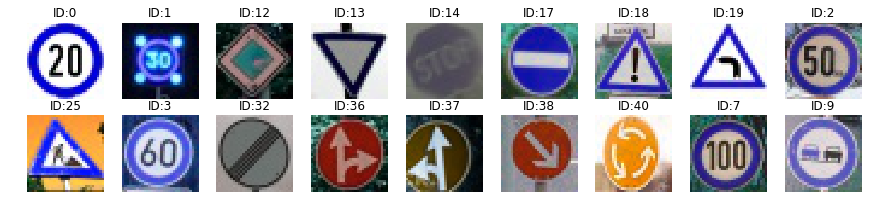

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob,os
import cv2
import matplotlib.image as mpimg
import numpy as np

my_images = []
correct_val=[]

for i, img in enumerate(glob.glob('./new_signs/*.jpg')):
    nameid=int(os.path.splitext(os.path.basename(img))[0])
    correct_val.append(nameid)
    image = cv2.imread(img,0)
    imgshow = cv2.imread(img,-1)
    plt.subplot(9, 9, i+1)
    plt.imshow(imgshow)
    plt.title("ID:"+str(nameid))
    plt.axis('off')
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    equ = clahe.apply(image)
    my_images.append(equ)

fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.show()



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I searched 18 candidate images from various resources in order to test my traffic sign classifiers. Some of the images are very similar to training images, such as the one with ID zero(shown above). However, images such as the one with ID 14 is rotated and blurred version of the STOP image in training collection. I would like to briefly introduce 2 test images that might mike classification difficult:

ID 1:  Speed limit(30) at night time. The shape of this sign is different from the merely rounded shape in training set.

ID 14: Rotated & grey blurred STOP sign. The bottom part of this sign is distorted.

As the summary report below shows, the prediction accuracy is 83.3% and therefore most errors are caused by misrecognition of ID 1 & 14.


In [14]:
my_images = np.asarray(my_images)
correct_val = np.asarray(correct_val)
def cal_mean_std(data):
    mean_std=[np.mean(data),np.std(data)]
    return mean_std

def data_norm(data, mean_std):
    data_norm = data.copy().astype(np.float32)
    for i in range(0,1):
        data_channel_i=data_norm
        data_norm=(data_channel_i - mean_std[0])/mean_std[1]
        
    return data_norm

mi_mean_std=cal_mean_std(my_images)
mi_norm = data_norm(my_images, mi_mean_std)
mi_norm=mi_norm.reshape([18,32*32])

saver= tf.train.Saver()
    
save_file = './train_tf_model.ckpt'
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess=sess, save_path=save_file)
    prediction = sess.run(y_conv,feed_dict={x:mi_norm,keep_prob: 1})
    top_k = sess.run(tf.nn.top_k(tf.nn.softmax(prediction), 5, sorted=True))
    pred_label=np.argmax(prediction, 1)
    print("prediction labels:",pred_label)
    print("True       Values:",correct_val)
    p_accuracy=np.sum(pred_label == correct_val)/len(correct_val)
    print("Prediction Accuracy:", "{:.1%}".format(p_accuracy))

prediction labels: [ 0  5 12 13  9 17 18 19  2 25  3 32 36 35 38 40  7  9]
True       Values: [ 0  1 12 13 14 17 18 19  2 25  3 32 36 37 38 40  7  9]
Prediction Accuracy: 83.3%


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

As the summary report above indicates, the prediction accuracy is 83.3% and therefore all the errors are caused by misrecognition of ID 1 & 14. Compared with the test accuracy of 97.32% in question 3, the prediction accuracy is slightly lower than that. 

Before testing the model on new images like ID 1 & 14, I also test this model with some images similar to training images and received all 100% prediction accuracy. So I can conclude that I might need a more advanced data augmentation techniques or more signal images to add more information on signal traffic recognitions.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

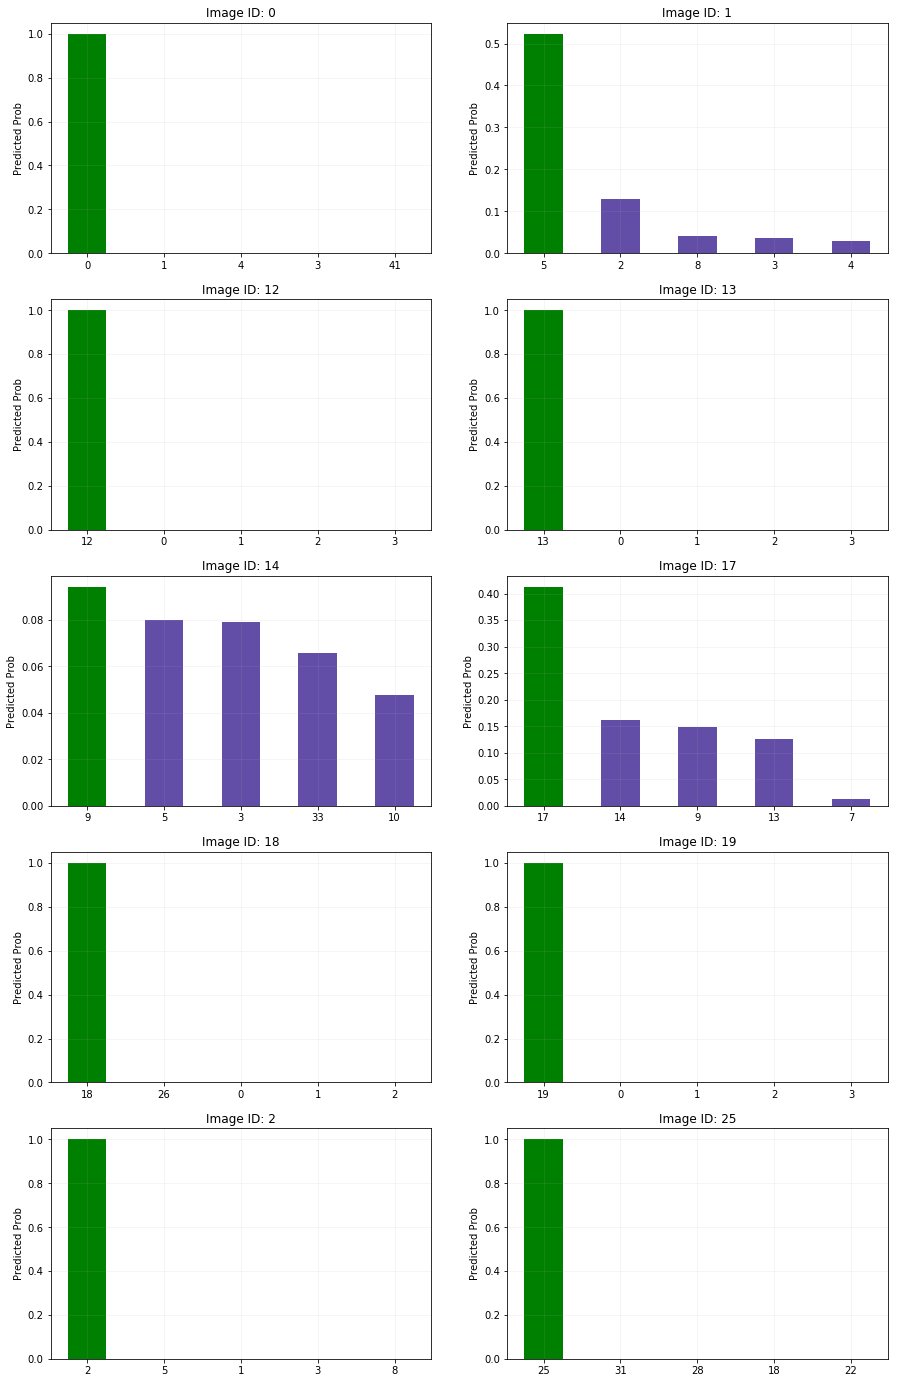

In [15]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

ns=10  # the x locations for the values
width = 0.5     # the width of the bars
colors = ['g','#624ea7','#624ea7','#624ea7','#624ea7']

for i in range(ns):
    plt.subplot(10, 2, i+1)
    values = top_k[0][i]
    plt.bar(np.arange(5), values, width, color=colors)
    plt.ylabel('Predicted Prob')
    plt.grid(which='major', alpha=0.15)
    plt.title("Image ID: "+str(correct_val[i]))
    plt.xticks(np.arange(5), tuple(top_k[1][i]))

fig = plt.gcf()
fig.set_size_inches(15, 50)
plt.show()

Based on the report above, I find that both image 1 & 14 are not even ranked in the top 5. More specifically, Image 1(Speed limit 30) is most-likely mis-recognized as image 5(Speed limit 80) while image 14(STOP sign) is most likely to be classified as image 9(No Passing).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.